In [1]:
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
colors = np.array(["green", "blue"])

In [2]:
mouse_name = 'jl009'
data_path = "Z:/Jenni/{}/behavimaging.mat".format(mouse_name)
mat = scipy.io.loadmat(data_path)
data = mat['behavimaging']

In [3]:
nBlocks = data.shape[-1]

In [4]:
def spk_zscore(raw_spks):
    '''
    spks with shape NN x NT
    '''
    spks = raw_spks - raw_spks.mean(axis=1)[:, np.newaxis]
    spks = spks / (spks**2).mean(axis=1)[:, np.newaxis]**.5
    return spks

In [27]:
titles = ['Hit', 'Miss', 'Correct Rejection', 'False Alarm']

# jl009 behavior

In [3]:
nBlocks = data.shape[-1]
pbRes = np.zeros((4, nBlocks))
rlRes = np.zeros((4, nBlocks))
nPB = np.zeros(nBlocks)
for i in range(nBlocks):
    block = data[0, i]
    behavior = block['behavdata']
    if behavior.shape[-1] > 0:
        nPB[i] = np.sum(behavior[0]>2)
        outcome = behavior[1]
        if nPB[i] > 0:
            pbIdx = np.where(behavior[0]>2)
            pbOutcome = outcome[pbIdx]
            for j in range(4):
                pbRes[j, i] = np.sum(pbOutcome == j+1) / nPB[i]
        
        rlIdx = np.where(behavior[0]<3)
        rlOutcome = outcome[rlIdx]
        for j in range(4):
            rlRes[j, i] = np.sum(rlOutcome == j+1) / (100 - nPB[i])

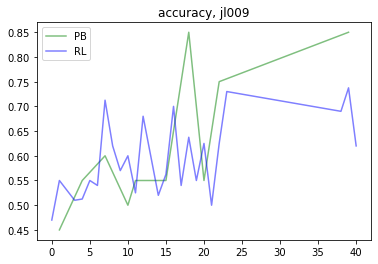

In [9]:
x = np.arange(nBlocks)
ptrue = pbRes[0] + pbRes[3]
rtrue = rlRes[0] + rlRes[3]

p_nonzero = np.where(ptrue>0)
r_nonzero = np.where(rtrue>0)
plt.plot(x[p_nonzero], ptrue[p_nonzero], color=colors[0], alpha=0.5, label='PB')
plt.plot(x[r_nonzero], rtrue[r_nonzero], color=colors[1], alpha=0.5, label='RL')
plt.title('accuracy, {}'.format(mouse_name))
plt.legend()

In [ ]:
for i in range(len(ptrue)):
    print(i, ptrue[i])
# 7 0.6
# 18 0.85
# 39 0.85

# axon activity

In [122]:
print(data.shape)

(1, 41)


In [18]:
# load spks, block 0, 18, 39
early_num = 0
mid_num = 18
late_num = 39
early_block = data[0, early_num]
mid_block = data[0, mid_num]
late_block = data[0, late_num]
blocks = [early_block, mid_block, late_block]

In [8]:
block = early_block
raw_spks = block['imagingdata']
print('spks', raw_spks.shape)
NA, NT = spks.shape

spks (175, 13540)


In [15]:
behavior = block['behavdata']
print('behavior: ', behavior.shape)

behavior:  (4, 13540)


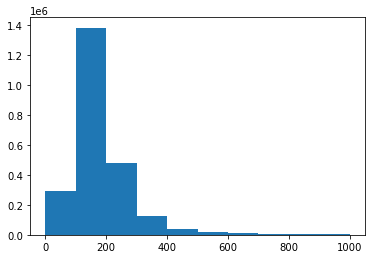

In [19]:
plt.hist(spks.reshape(-1), range=(0, 1000))
plt.show()

In [20]:
# zscore
spks = raw_spks - raw_spks.mean(axis=1)[:, np.newaxis]
spks = spks / (spks**2).mean(axis=1)[:, np.newaxis]**.5

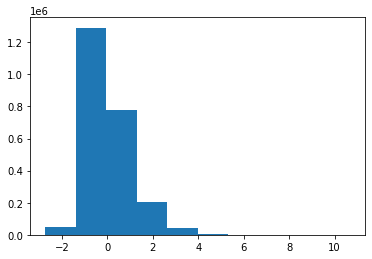

In [21]:
plt.hist(spks.reshape(-1))
plt.show()

spks (175, 13540)
spks (171, 9840)
spks (180, 11088)


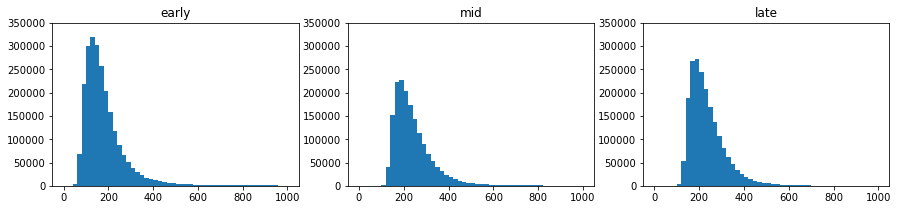

In [22]:
titles = ['early', 'mid', 'late']
plt.figure(figsize=(15, 3))
for i, block in enumerate(blocks):
    raw_spks = block['imagingdata']
    print('spks', raw_spks.shape)
    # zscore
    spks = raw_spks
    plt.subplot(1,3,i+1)
    plt.hist(spks.reshape(-1), bins=50, range=(0, 1000))
    plt.title(titles[i])
    plt.ylim([0, 350000])
plt.show()

spks (175, 13540)
spks (171, 9840)
spks (180, 11088)


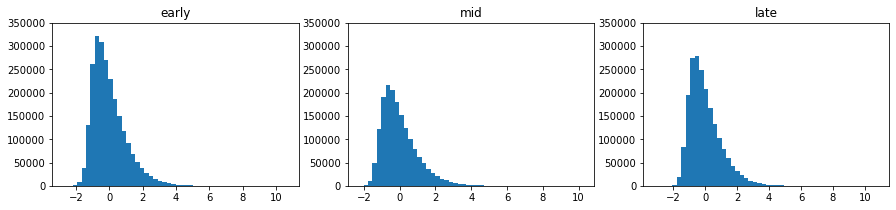

In [23]:
plt.figure(figsize=(15, 3))
for i, block in enumerate(blocks):
    raw_spks = block['imagingdata']
    print('spks', raw_spks.shape)
    # zscore
    spks = raw_spks - raw_spks.mean(axis=1)[:, np.newaxis]
    spks = spks / (spks**2).mean(axis=1)[:, np.newaxis]**.5
    plt.subplot(1,3,i+1)
    plt.hist(spks.reshape(-1), bins=50)
    plt.title(titles[i])
    plt.ylim([0, 350000])
plt.show()

# average activity

In [26]:
# average response
titles = ['early', 'mid', 'late']
for i, block in enumerate(blocks):
    fig_save_path = os.path.join('figures', 'axon-avgspks_{}_{}'.format(mouse_name, titles[i]))
    plt.figure(figsize=(15, 10))
    behavior = block['behavdata']
    raw_spks = block['imagingdata']
    print('spks', raw_spks.shape)
    NA, NT = raw_spks.shape
    # zscore
    spks = raw_spks - raw_spks.mean(axis=1)[:, np.newaxis]
    spks = spks / (spks**2).mean(axis=1)[:, np.newaxis]**.5
    plt.subplot(3,1,1)
    x = np.arange(NT)
    plt.plot(x, np.average(spks, axis=0))
    plt.title('zscored average activity')
    plt.subplot(312)
    plt.plot(x, behavior[0], alpha=0.3, label='1')
    plt.title('tone')
    plt.subplot(313)
    plt.plot(x, behavior[1], alpha=0.3, label='2')
    plt.title('outcome')
    plt.suptitle(titles[i])
    plt.savefig(fig_save_path)
    plt.close()

spks (175, 13540)
spks (171, 9840)
spks (180, 11088)


In [ ]:
# average response
titles = ['early', 'mid', 'late']
for i in range(data.shape[-1]):
    block = data[0, i]
    fig_save_path = os.path.join('figures', 'axon-avgspks_{}_block-{}'.format(mouse_name, i+1))
    plt.figure(figsize=(15, 10))
    behavior = block['behavdata']
    raw_spks = block['imagingdata']
    print('spks', raw_spks.shape)
    NA, NT = raw_spks.shape
    if NT > 0:
        # zscore
        spks = raw_spks - raw_spks.mean(axis=1)[:, np.newaxis]
        spks = spks / (spks**2).mean(axis=1)[:, np.newaxis]**.5
        plt.subplot(3,1,1)
        x = np.arange(NT)
        plt.plot(x, np.average(spks, axis=0))
        plt.title('zscored average activity')
        plt.subplot(312)
        plt.plot(x, behavior[0], alpha=0.3, label='1')
        plt.title('tone')
        plt.subplot(313)
        plt.plot(x, behavior[1], alpha=0.3, label='2')
        plt.title('outcome')
        plt.suptitle('block {}'.format(i+1))
        plt.savefig(fig_save_path)
        plt.close()

# Context shift effect
check if the increase of activity after context shift is universal.

start from the begining or behavior training, not a learned thing.

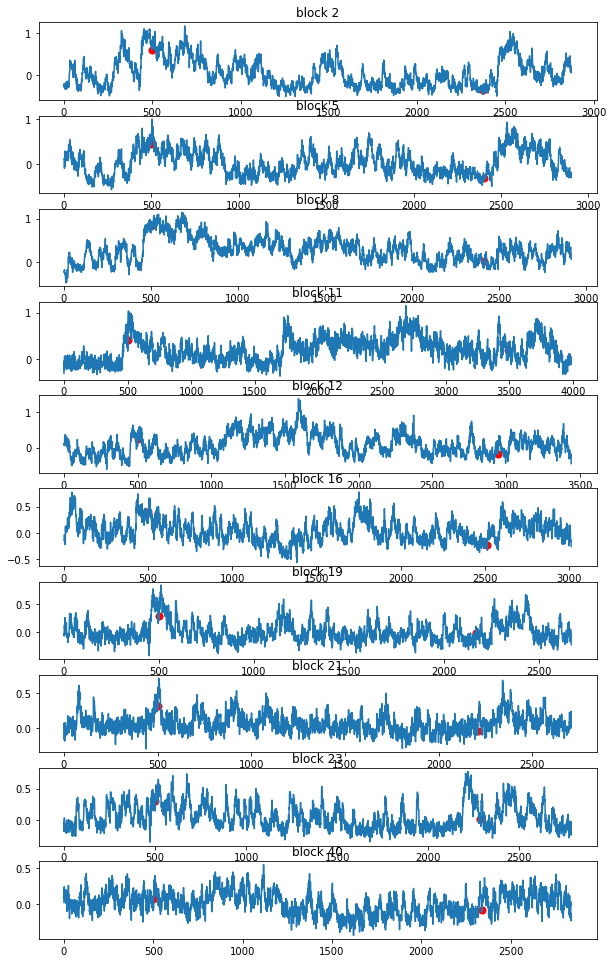

In [51]:
# seperate pb trials
plt.figure(figsize=(10, 70))
n = 0
for i in range(nBlocks):
    block = data[0, i]
    raw_spks = block['imagingdata']
    NA, NT = raw_spks.shape
    
    if NT > 0:
        behavior = block['behavdata']
        pbidx = np.where(behavior[0]>2)[0]
        if len(pbidx) > 0:
            n += 1
            plt.subplot(nBlocks, 1, n)
            istart = pbidx[0] # start of pb trials
            iend = pbidx[-1]
            spks = raw_spks - raw_spks.mean(axis=1)[:, np.newaxis]
            spks = spks / (spks**2).mean(axis=1)[:, np.newaxis]**.5
            pbspks = spks[:, (istart-500):(iend+500)]
            x = np.arange(pbspks.shape[-1])
            avgspks = np.average(pbspks, axis=0)
            plt.plot(x, avgspks)
            plt.scatter(500, avgspks[500], c='red', s=50)
            plt.scatter(iend-istart+500, avgspks[-500], c='red', s=50)
            plt.title('block {}'.format(i+1))
# plt.suptitle('zscored average activity')
plt.show()

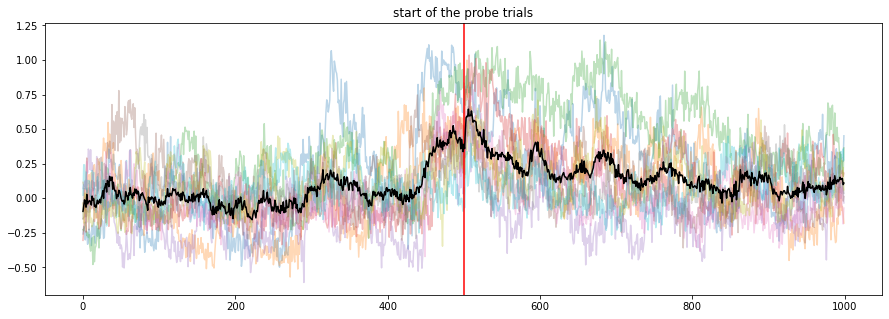

In [56]:
# pb start
plt.figure(figsize=(15, 5))
start_spks = []
for i in range(nBlocks):
    block = data[0, i]
    raw_spks = block['imagingdata']
    NA, NT = raw_spks.shape
    if NT > 0:
        behavior = block['behavdata']
        pbidx = np.where(behavior[0]>2)[0]
        if len(pbidx) > 0:
            istart = pbidx[0] # start of pb trials
            iend = pbidx[-1]
            spks = raw_spks - raw_spks.mean(axis=1)[:, np.newaxis]
            spks = spks / (spks**2).mean(axis=1)[:, np.newaxis]**.5
            pbspks = spks[:, (istart-500):(istart+500)]
            x = np.arange(pbspks.shape[-1])
            avgspks = np.average(pbspks, axis=0)
            start_spks.append(avgspks)
            plt.plot(x, avgspks, alpha=0.3)
plt.axvline(x=500, c='red')
start_spks = np.vstack(start_spks)
plt.plot(x, np.average(start_spks, axis=0), c='black')
plt.title('start of the probe trials')
plt.show()

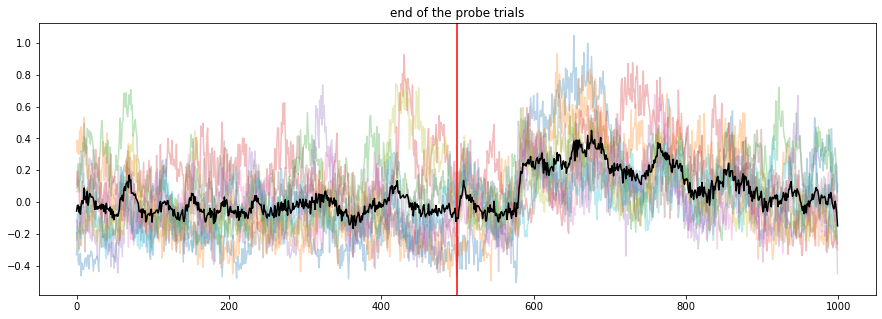

In [57]:
# pb start
plt.figure(figsize=(15, 5))
end_spks = []
for i in range(nBlocks):
    block = data[0, i]
    raw_spks = block['imagingdata']
    NA, NT = raw_spks.shape
    if NT > 0:
        behavior = block['behavdata']
        pbidx = np.where(behavior[0]>2)[0]
        if len(pbidx) > 0:
            istart = pbidx[0] # start of pb trials
            iend = pbidx[-1]
            spks = raw_spks - raw_spks.mean(axis=1)[:, np.newaxis]
            spks = spks / (spks**2).mean(axis=1)[:, np.newaxis]**.5
            pbspks = spks[:, (iend-500):(iend+500)]
            x = np.arange(pbspks.shape[-1])
            avgspks = np.average(pbspks, axis=0)
            end_spks.append(avgspks)
            plt.plot(x, avgspks, alpha=0.3)
plt.axvline(x=500, c='red')
end_spks = np.vstack(end_spks)
plt.plot(x, np.average(end_spks, axis=0), c='black')
plt.title('end of the probe trials')
plt.show()

# tone resposne

## zscore

93.42424242424242


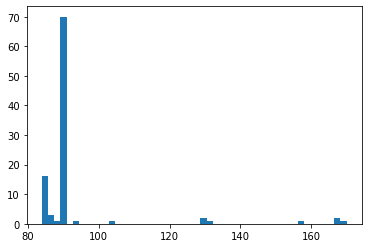

In [179]:
block = mid_block
behavior = block['behavdata']
tidx = np.where(behavior[0]>0)[0]
diff = tidx[1:] - tidx[:-1]
print(np.average(diff))
plt.hist(diff, bins=50)
plt.title('Distribution of number of frames between 2 trials(mid block)')
plt.show()

(21, 200)


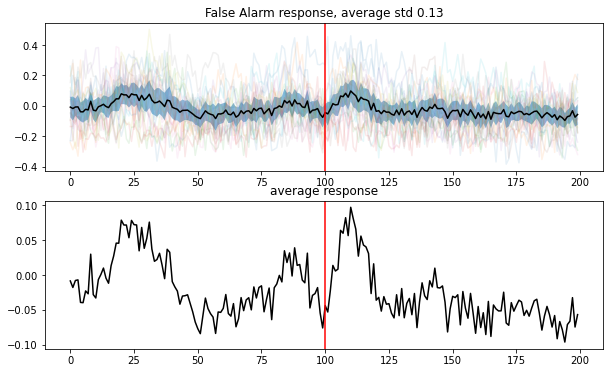

In [150]:
x = np.arange(200)
draw_spks = ftspks[1] 
print(draw_spks.shape)

avg_spks = np.average(draw_spks, axis=0)
std = np.std(draw_spks, axis=0)

plt.figure(figsize=(10, 6))
plt.subplot(211)
for i in range(draw_spks.shape[0]):
    plt.plot(x, draw_spks[i], alpha=0.1)
plt.fill_between(x, avg_spks+sem/2, avg_spks-sem/2, alpha=0.5, label='std')
plt.plot(np.average(draw_spks, axis=0), c='black')
plt.axvline(x=100, c='red')
plt.title('False Alarm response, average std {:.2f}'.format(np.mean(std)))
plt.subplot(212)
plt.plot(avg_spks, c='black')
plt.axvline(x=100, c='red')
plt.title('average response')
plt.show()

In [174]:
# 2 tones
# 2 conditions, PB and RL
# 2 outcomes, True or false

# For RL condition, 2x2 = 4 figures
# seperate pb trials

# for n in range(nBlocks):
# fig_save_path = os.path.join('figures', 'tone-avgspks_{}_block-{}'.format(mouse_name, n))
def get_tone_response(block, context='rl'):
    '''
    context: 'rl' or 'pb', 'rl' is default
    '''
    ttspks = [] # target tone response
    ftspks = [] # foil tone response
    for i in range(2):
        ttspks.append([]) # ttspks[0]: Hit, ttspks[1]: Miss
        ftspks.append([]) # ftspks[0]: correct rejection, ftspks[1]: 

    raw_spks = block['imagingdata']
    NA, NT = raw_spks.shape

    if NT > 0:
        behavior = block['behavdata']
        icondition = np.where(behavior[0]<3)[0] # Rl condition indexes
        spks = raw_spks - raw_spks.mean(axis=1)[:, np.newaxis]
        spks = spks / (spks**2).mean(axis=1)[:, np.newaxis]**.5
        
        if context == 'rl':
            # target tone
            itt = np.where(behavior[0]==1)[0]
            # foil tone
            ift = np.where(behavior[0]==2)[0]
        elif context == 'pb':
            itt = np.where(behavior[0]==3)[0]
            ift = np.where(behavior[0]==4)[0]
        else:
            printn("only support 'rl' or 'pb' as context!")

        ## 2 outcomes
        for i in range(2):
            oidx = np.where(behavior[1] == (i+1))[0] # outcome idx
            oidx = np.intersect1d(itt, oidx) # overlap of ton and outcome idx
            for k in oidx:
                if (100 <= k) and ((k+100) <= NT):
                    ttspks[i].append(np.mean(spks[:, (k-100):(k+100)], axis=0))

            oidx = np.where(behavior[1] == (4-i))[0] # outcome idx
            oidx = np.intersect1d(ift, oidx) # overlap of ton and outcome idx
            for k in oidx:
                if (100 <= k) and ((k+100) <= NT):
                    ftspks[i].append(np.mean(spks[:, (k-100):(k+100)], axis=0))

    for i in range(2):
        if len(ttspks[i]) > 0:
            ttspks[i] = np.vstack(ttspks[i])
            print('ttspk', ttspks[i].shape)
        if len(ftspks[i]) > 0:
            ftspks[i] = np.vstack(ftspks[i])
            print('ftspk', ftspks[i].shape)

    spks_list = [ttspks[0], ttspks[1], ftspks[0], ftspks[1]] 
    # [hit_spk, miss_spk, cr_spk, fa_apk]
    return spks_list

In [177]:
early_spks_list = get_tone_response(data[0, 1], context='pb')
mid_spks_list = get_tone_response(mid_block, context='pb')
late_spks_list = get_tone_response(late_block, context='pb')

ttspk (2, 200)
ftspk (7, 200)
ttspk (8, 200)
ftspk (3, 200)
ttspk (7, 200)
ftspk (10, 200)
ttspk (3, 200)
ttspk (10, 200)
ftspk (7, 200)
ftspk (3, 200)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0.98, 'probe average response')

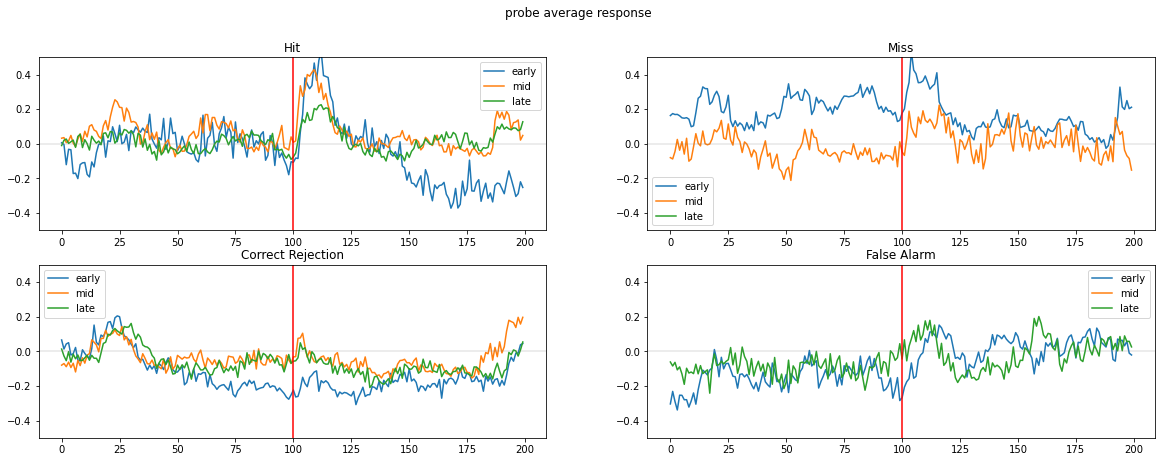

In [178]:
# plot
titles = ['Hit', 'Miss', 'Correct Rejection', 'False Alarm']
draw_spks_list = [ttspks[0], ttspks[1], ftspks[0], ftspks[1]]
x = np.arange(200)
plt.figure(figsize=(20, 7))
for k, draw_spks in enumerate(draw_spks_list):
    plt.subplot(2, 2, k+1)
    plt.title(titles[k])
    plt.plot(np.average(early_spks_list[k], axis=0), label='early')
    plt.plot(np.average(mid_spks_list[k], axis=0), label='mid')
    plt.plot(np.average(late_spks_list[k], axis=0), label='late')
    plt.axvline(x=100, c='red')
    plt.axhline(y=0, c='grey', alpha=0.2)
    plt.ylim([-0.5, 0.5])
    plt.legend()
plt.suptitle('probe average response')
# plt.savefig(fig_save_path)
# plt.close()

In [181]:
# all blocks rl trials
rl_spk_list = []
for nb in range(nBlocks):
    block_spk_list = get_tone_response(data[0, nb], context='rl')
    rl_spk_list.append(block_spk_list)

ttspk (40, 200)
ftspk (6, 200)
ttspk (10, 200)
ftspk (43, 200)
ttspk (20, 200)
ftspk (23, 200)
ttspk (20, 200)
ftspk (16, 200)
ttspk (10, 200)
ftspk (42, 200)
ttspk (40, 200)
ftspk (7, 200)
ttspk (41, 200)
ftspk (10, 200)
ttspk (9, 200)
ftspk (40, 200)
ttspk (19, 200)
ftspk (22, 200)
ttspk (21, 200)
ftspk (18, 200)
ttspk (26, 200)
ftspk (28, 200)
ttspk (23, 200)
ftspk (22, 200)
ttspk (48, 200)
ftspk (5, 200)
ttspk (2, 200)
ftspk (44, 200)
ttspk (37, 200)
ftspk (19, 200)
ttspk (3, 200)
ftspk (20, 200)
ttspk (13, 200)
ftspk (48, 200)
ttspk (36, 200)
ftspk (2, 200)
ttspk (50, 200)
ftspk (6, 200)
ftspk (43, 200)
ttspk (13, 200)
ftspk (34, 200)
ttspk (27, 200)
ftspk (5, 200)
ttspk (40, 200)
ftspk (2, 200)
ftspk (38, 200)
ttspk (47, 200)
ftspk (20, 200)
ttspk (2, 200)
ftspk (30, 200)
ttspk (50, 200)
ftspk (2, 200)
ftspk (48, 200)
ttspk (40, 200)
ftspk (4, 200)
ftspk (35, 200)
ttspk (31, 200)
ftspk (38, 200)
ttspk (19, 200)
ftspk (11, 200)
ttspk (50, 200)
ftspk (4, 200)
ftspk (46, 200)
ttspk 

e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No handles with labels found to put in legend.
e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
e:\kishorelab\env\fengtong\lib\site-pa

Text(0.5, 0.98, 'reinforce average response')

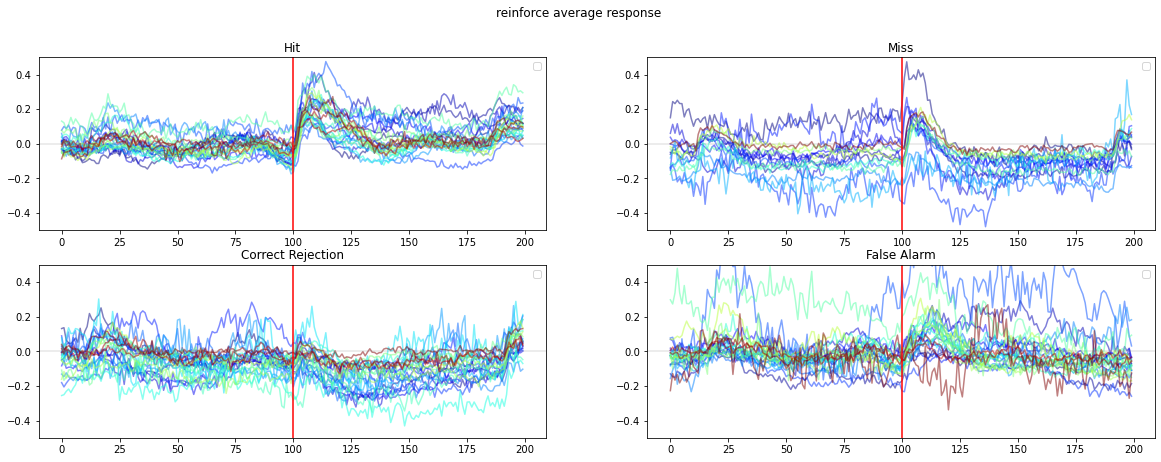

In [190]:
titles = ['Hit', 'Miss', 'Correct Rejection', 'False Alarm']
x = np.arange(200)
plt.figure(figsize=(20, 7))
colors = plt.cm.jet(np.linspace(0,1,nBlocks))
for k in range(4):
    plt.subplot(2, 2, k+1)
    plt.title(titles[k])
    for nb in range(nBlocks):
        spks_list = rl_spk_list[nb]
        plt.plot(np.average(spks_list[k], axis=0), color=colors[nb], alpha=0.5)
    plt.axvline(x=100, c='red')
    plt.axhline(y=0, c='grey', alpha=0.2)
    plt.ylim([-0.5, 0.5])
    plt.legend()
plt.suptitle('reinforce average response')

In [185]:
# all blocks pb trials
pb_spk_list = []
for nb in range(nBlocks):
    block_spk_list = get_tone_response(data[0, nb], context='pb')
    pb_spk_list.append(block_spk_list)

ttspk (2, 200)
ftspk (7, 200)
ttspk (8, 200)
ftspk (3, 200)
ttspk (3, 200)
ftspk (8, 200)
ttspk (7, 200)
ftspk (2, 200)
ttspk (5, 200)
ftspk (7, 200)
ttspk (5, 200)
ftspk (3, 200)
ttspk (3, 200)
ftspk (7, 200)
ttspk (7, 200)
ftspk (3, 200)
ttspk (10, 200)
ftspk (1, 200)
ftspk (9, 200)
ttspk (9, 200)
ftspk (2, 200)
ttspk (1, 200)
ftspk (8, 200)
ttspk (7, 200)
ftspk (10, 200)
ttspk (3, 200)
ttspk (1, 200)
ftspk (10, 200)
ttspk (9, 200)
ttspk (8, 200)
ftspk (7, 200)
ttspk (2, 200)
ftspk (3, 200)
ttspk (10, 200)
ftspk (7, 200)
ftspk (3, 200)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeW

e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeW

Text(0.5, 0.98, 'probe average response')

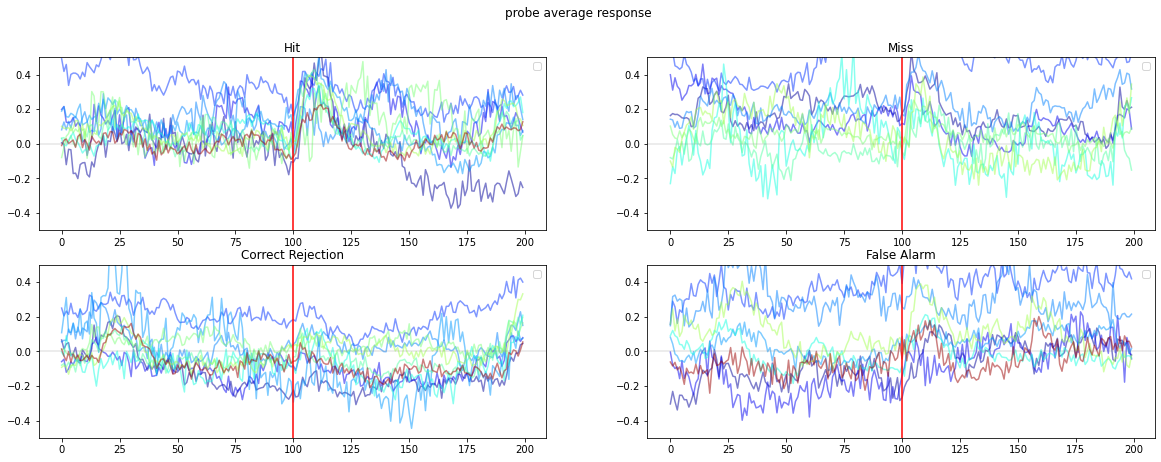

In [188]:
titles = ['Hit', 'Miss', 'Correct Rejection', 'False Alarm']
x = np.arange(200)
plt.figure(figsize=(20, 7))
for k in range(4):
    plt.subplot(2, 2, k+1)
    plt.title(titles[k])
    for nb in range(nBlocks):
        spks_list = pb_spk_list[nb]
        plt.plot(np.average(spks_list[k], axis=0), color=colors[nb], alpha=0.5)
    plt.axvline(x=100, c='red')
    plt.axhline(y=0, c='grey', alpha=0.2)
    plt.ylim([-0.5, 0.5])
    plt.legend()
plt.suptitle('probe average response')

## dF/F
divide by average of several frames response before the tone

### Helper

In [105]:
def get_tone_response_df(block, context='rl'):
    '''
    context: 'rl' or 'pb', 'rl' is default
    '''
    ttspks = [] # target tone response
    ftspks = [] # foil tone response
    
    raw_spks = block['imagingdata']
    NA, NT = raw_spks.shape
    spks = raw_spks

    if NT > 0:
        behavior = block['behavdata']
        icondition = np.where(behavior[0]<3)[0] # Rl condition indexes
#         spks = raw_spks - raw_spks.mean(axis=1)[:, np.newaxis]
#         spks = spks / (spks**2).mean(axis=1)[:, np.newaxis]**.5
        
        if context == 'rl':
            # target tone
            itt = np.where(behavior[0]==1)[0]
            # foil tone
            ift = np.where(behavior[0]==2)[0]
        elif context == 'pb':
            itt = np.where(behavior[0]==3)[0]
            ift = np.where(behavior[0]==4)[0]
        else:
            printn("only support 'rl' or 'pb' as context!")

        ## 2 outcomes
        for i in range(2):
            avg_df = 0
            n = 0
            oidx = np.where(behavior[1] == (i+1))[0] # outcome idx
            oidx = np.intersect1d(itt, oidx) # overlap of ton and outcome idx
            for k in oidx:
                if (100 <= k) and ((k+100) <= NT):
                    f0 = np.mean(spks[:, (k-30):(k-15)], axis=1)
                    ft = spks[:, (k-30):(k+45)]
                    f0 = np.repeat(f0[:, np.newaxis], ft.shape[-1], axis=1)
                    df = (ft - f0) / f0
                    avg_df += df
                    n += 1
            if n > 0:
                avg_df = avg_df / n
            else:
                avg_df = []
            ttspks.append(avg_df)
            
            avg_df = 0
            n = 0
            oidx = np.where(behavior[1] == (4-i))[0] # outcome idx
            oidx = np.intersect1d(ift, oidx) # overlap of ton and outcome idx
            for k in oidx:
                if (100 <= k) and ((k+100) <= NT):
                    f0 = np.mean(spks[:, (k-30):(k-15)], axis=1)
                    ft = spks[:, (k-30):(k+45)]
                    f0 = np.repeat(f0[:, np.newaxis], ft.shape[-1], axis=1)
                    df = (ft - f0) / f0
                    avg_df += df
                    n += 1
            if n > 0:
                avg_df = avg_df / n
            else:
                avg_df = []
            ftspks.append(avg_df)

#     for i in range(2):
#         if len(ttspks[i]) > 0:
#             ttspks[i] = np.vstack(ttspks[i])
#             # print('ttspk', ttspks[i].shape)
#         if len(ftspks[i]) > 0:
#             ftspks[i] = np.vstack(ftspks[i])
#             # print('ftspk', ftspks[i].shape)

    spks_list = [ttspks[0], ttspks[1], ftspks[0], ftspks[1]] 
    # [hit_spk, miss_spk, cr_spk, fa_apk]
    return spks_list

In [5]:
def get_all_tone_response(block, context='rl'):
    '''
    return average spk of each trial
    context: 'rl' or 'pb', 'rl' is default
    '''
    ttspks = [] # target tone response
    ftspks = [] # foil tone response
    
    raw_spks = block['imagingdata']
    NA, NT = raw_spks.shape
    spks = raw_spks

    if NT > 0:
        behavior = block['behavdata']
        icondition = np.where(behavior[0]<3)[0] # Rl condition indexes

        if context == 'rl':
            # target tone
            itt = np.where(behavior[0]==1)[0]
            # foil tone
            ift = np.where(behavior[0]==2)[0]
        elif context == 'pb':
            itt = np.where(behavior[0]==3)[0]
            ift = np.where(behavior[0]==4)[0]
        else:
            printn("only support 'rl' or 'pb' as context!")

        ## 2 outcomes
        for i in range(2):
            n = 0
            oidx = np.where(behavior[1] == (i+1))[0] # outcome idx
            oidx = np.intersect1d(itt, oidx) # overlap of tone  context and outcome idx
            all_df = []
            for k in oidx:
                if (100 <= k) and ((k+100) <= NT):
                    f0 = np.mean(spks[:, (k-30):(k-15)], axis=1)
                    ft = spks[:, (k-30):(k+45)]
                    f0 = np.repeat(f0[:, np.newaxis], ft.shape[-1], axis=1)
                    df = (ft - f0) / f0
                    all_df.append(np.mean(df, axis=0))
                    n += 1
            if n > 0:
                all_df = np.vstack(all_df)
            ttspks.append(all_df)
            
            n = 0
            oidx = np.where(behavior[1] == (4-i))[0] # outcome idx
            oidx = np.intersect1d(ift, oidx) # overlap of ton and outcome idx
            all_df = []
            for k in oidx:
                if (100 <= k) and ((k+100) <= NT):
                    f0 = np.mean(spks[:, (k-30):(k-15)], axis=1)
                    ft = spks[:, (k-30):(k+45)]
                    f0 = np.repeat(f0[:, np.newaxis], ft.shape[-1], axis=1)
                    df = (ft - f0) / f0
                    all_df.append(np.mean(df, axis=0))
                    n += 1
            if n > 0:
                all_df = np.vstack(all_df)
            ftspks.append(all_df)
        spks_list = [ttspks[0], ttspks[1], ftspks[0], ftspks[1]] # [hit_spk, miss_spk, cr_spk, fa_apk]
        return spks_list
    else:
        return None
    

e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0.98, 'reinforce average response')

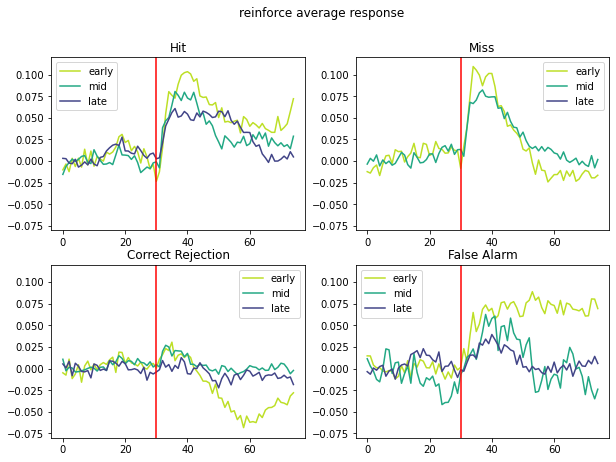

In [106]:
early_spks_list = get_tone_response_df(data[0, 1], context='rl')
mid_spks_list = get_tone_response_df(mid_block, context='rl')
late_spks_list = get_tone_response_df(late_block, context='rl')

titles = ['Hit', 'Miss', 'Correct Rejection', 'False Alarm']
x = np.arange(early_spks_list[0].shape[-1])
plt.figure(figsize=(10, 7))
cmap = plt.cm.get_cmap('viridis_r')
# colors = cmap(np.linspace(0,1,n))
for k in range(4):
    plt.subplot(2, 2, k+1)
    plt.title(titles[k])
    plt.plot(np.average(early_spks_list[k], axis=0), label='early', color=cmap(0.1))
    plt.plot(np.average(mid_spks_list[k], axis=0), label='mid', color=cmap(0.4))
    plt.plot(np.average(late_spks_list[k], axis=0), label='late', color=cmap(0.8))
    plt.axvline(x=30, c='red')
    # plt.axhline(y=0, c='grey', alpha=0.2)
    plt.ylim([-0.08, 0.12])
    plt.legend()
plt.suptitle('reinforce average response')

e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0.98, 'probe average response')

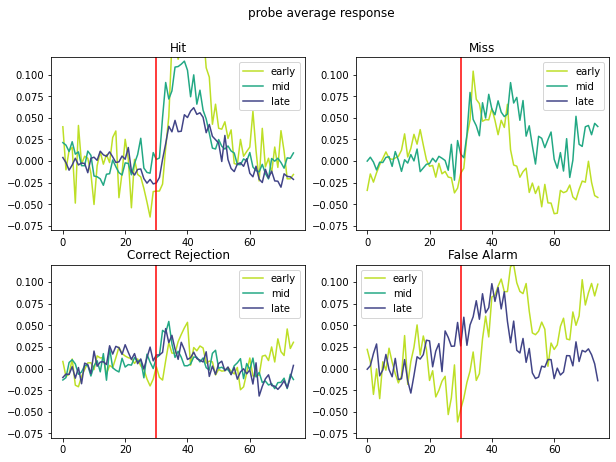

In [107]:
early_spks_list = get_tone_response_df(data[0, 1], context='pb')
mid_spks_list = get_tone_response_df(mid_block, context='pb')
late_spks_list = get_tone_response_df(late_block, context='pb')

titles = ['Hit', 'Miss', 'Correct Rejection', 'False Alarm']
x = np.arange(early_spks_list[0].shape[-1])
plt.figure(figsize=(10, 7))
cmap = plt.cm.get_cmap('viridis_r')
# colors = cmap(np.linspace(0,1,n))
for k in range(4):
    plt.subplot(2, 2, k+1)
    plt.title(titles[k])
    plt.plot(np.average(early_spks_list[k], axis=0), label='early', color=cmap(0.1))
    plt.plot(np.average(mid_spks_list[k], axis=0), label='mid', color=cmap(0.4))
    plt.plot(np.average(late_spks_list[k], axis=0), label='late', color=cmap(0.8))
    plt.axvline(x=30, c='red')
    # plt.axhline(y=0, c='grey', alpha=0.2)
    plt.ylim([-0.08, 0.12])
    plt.legend()
plt.suptitle('probe average response')

e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0.98, 'average response')

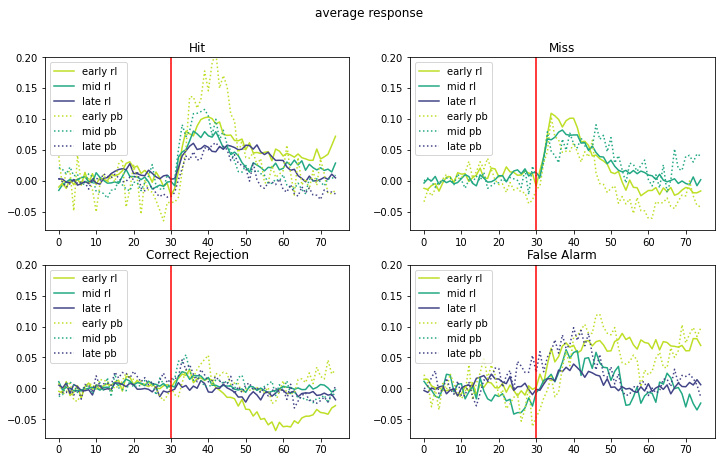

In [108]:
early_spks_list = get_tone_response_df(data[0, 1], context='rl')
mid_spks_list = get_tone_response_df(mid_block, context='rl')
late_spks_list = get_tone_response_df(late_block, context='rl')

pb_early_spks_list = get_tone_response_df(data[0, 1], context='pb')
pb_mid_spks_list = get_tone_response_df(mid_block, context='pb')
pb_late_spks_list = get_tone_response_df(late_block, context='pb')

titles = ['Hit', 'Miss', 'Correct Rejection', 'False Alarm']
x = np.arange(early_spks_list[0].shape[-1])
plt.figure(figsize=(12, 7))
cmap = plt.cm.get_cmap('viridis_r')
# colors = cmap(np.linspace(0,1,n))
for k in range(4):
    plt.subplot(2, 2, k+1)
    plt.title(titles[k])
    plt.plot(np.average(early_spks_list[k], axis=0), label='early rl', color=cmap(0.1))
    plt.plot(np.average(mid_spks_list[k], axis=0), label='mid rl', color=cmap(0.4))
    plt.plot(np.average(late_spks_list[k], axis=0), label='late rl', color=cmap(0.8))
    plt.plot(np.average(pb_early_spks_list[k], axis=0), label='early pb', color=cmap(0.1), linestyle=':')
    plt.plot(np.average(pb_mid_spks_list[k], axis=0), label='mid pb', color=cmap(0.4), linestyle=':')
    plt.plot(np.average(pb_late_spks_list[k], axis=0), label='late pb', color=cmap(0.8), linestyle=':')
    plt.axvline(x=30, c='red')
    # plt.axhline(y=0, c='grey', alpha=0.2)
    plt.ylim([-0.08, 0.2])
    plt.legend()
plt.suptitle('average response')

## first day

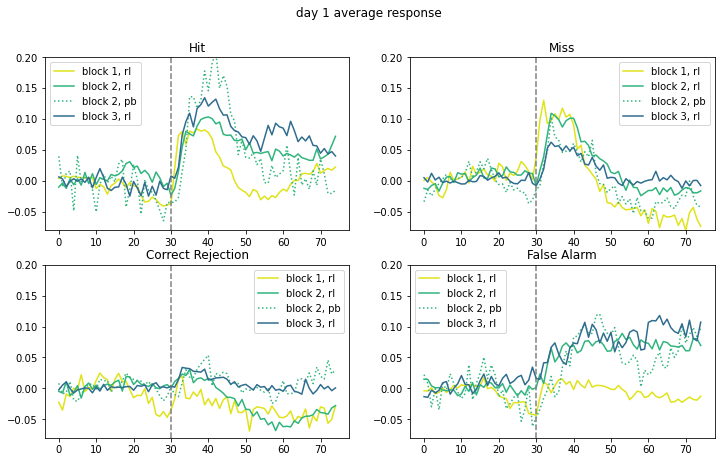

In [56]:
plt.figure(figsize=(12, 7))
for i in range(3):
    block = data[0, i]
    pb_spks = get_tone_response_df(data[0, i], context='pb')
    rl_spks = get_tone_response_df(data[0, i], context='rl')
    for k in range(4):
        plt.subplot(2, 2, k+1)
        plt.title(titles[k])
        plt.plot(np.average(rl_spks[k], axis=0), label='block {}, rl'.format(i+1), color=cmap(0.3*i+0.05))
        if len(pb_spks[k])>0:
            plt.plot(np.average(pb_spks[k], axis=0), label='block {}, pb'.format(i+1), color=cmap(0.3*i+0.05), linestyle=':')
        plt.axvline(x=30, c='grey', linestyle='--', alpha=0.5)
        # plt.axhline(y=0, c='grey', alpha=0.2)
        plt.ylim([-0.08, 0.2])
        plt.legend()
plt.suptitle('day 1 average response')
plt.show()

In [203]:
nblocks = 1
iblocks = [] # start block index of each day
for i in range(nBlocks):
    block = data[0, i]
    day = block['day']
    behavior = block['behavdata']
    print(day, behavior[0].shape)
    if len(day[0]) > 0:
        day = day[0][0]
        print('block {}, day {}'.format(i+1, day))
        if i == 0:
            pre_day = day
        elif pre_day == day:
            nblocks += 1
        elif pre_day < day:
            iblocks.append(nblocks)
            nblocks = 1
print(len(iblocks))
print(iblocks)

[[1]] (13540,)
block 1, day 1
[[1]] (11474,)
block 2, day 1
[[1]] (9940,)
block 3, day 1
[[2]] (12694,)
block 4, day 2
[[2]] (11763,)
block 5, day 2
[[2]] (10724,)
block 6, day 2
[[3]] (12837,)
block 7, day 3
[[3]] (11079,)
block 8, day 3
[[3]] (9749,)
block 9, day 3
[[4]] (12036,)
block 10, day 4
[[4]] (11169,)
block 11, day 4
[[5]] (12982,)
block 12, day 5
[[5]] (11402,)
block 13, day 5
[] (0,)
[[6]] (13034,)
block 15, day 6
[[6]] (12764,)
block 16, day 6
[[6]] (9911,)
block 17, day 6
[[7]] (13208,)
block 18, day 7
[[7]] (9840,)
block 19, day 7
[[8]] (11484,)
block 20, day 8
[[8]] (9692,)
block 21, day 8
[[9]] (12456,)
block 22, day 9
[[9]] (11356,)
block 23, day 9
[[9]] (10626,)
block 24, day 9
[] (0,)
[] (0,)
[] (0,)
[] (0,)
[] (0,)
[] (0,)
[] (0,)
[] (0,)
[] (0,)
[] (0,)
[] (0,)
[] (0,)
[] (0,)
[] (0,)
[[15]] (11260,)
block 39, day 15
[[15]] (11088,)
block 40, day 15
[[15]] (9496,)
block 41, day 15
23
[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [70]:
nb = 1
iblocks = [] # start block index of each day
nblocks = []
idays = [] # day numbers
for i in range(nBlocks):
    block = data[0, i]
    day = block['day']
    if len(day[0]) > 0:
        day = day[0][0]
        if i == 0:
            pre_day = day
            iblocks.append(i)
        elif pre_day == day:
            nb += 1
        elif pre_day < day:
            idays.append(pre_day)
            pre_day = day
            nblocks.append(nb)
            iblocks.append(i)
            nb = 1
idays.append(day)
nblocks.append(nb)
print(iblocks)
print(idays)
print(nblocks)

[0, 3, 6, 9, 11, 14, 17, 19, 21, 38]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 15]
[3, 3, 3, 2, 2, 3, 2, 2, 3, 3]


In [61]:
print(iblocks[:1])

[3]


In [109]:
for j, day in enumerate(idays):
    fig_save_path = os.path.join('figures', 'daily_avg_response', 'day-{}_avg-response'.format(day))
    plt.figure(figsize=(12, 7))
    istart = iblocks[j]
    iend = istart + nblocks[j]
    for i in range(istart, iend):
        block = data[0, i]
        pb_spks = get_tone_response_df(data[0, i], context='pb')
        rl_spks = get_tone_response_df(data[0, i], context='rl')
        nb = i-istart
        for k in range(4):
            plt.subplot(2, 2, k+1)
            plt.title(titles[k])
            if len(rl_spks[k])>0:
                plt.plot(np.average(rl_spks[k], axis=0), label='block {}, rl'.format(nb+1), color=cmap(0.3*nb+0.05))
            if len(pb_spks[k])>0:
                plt.plot(np.average(pb_spks[k], axis=0), label='block {}, pb'.format(nb+1), color=cmap(0.3*nb+0.05), linestyle=':')
            plt.axvline(x=30, c='red')
            # plt.axhline(y=0, c='grey', alpha=0.2)
            plt.ylim([-0.08, 0.2])
            plt.legend()
    plt.suptitle('day {} average response'.format(day))
    plt.savefig(fig_save_path)
    plt.close()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


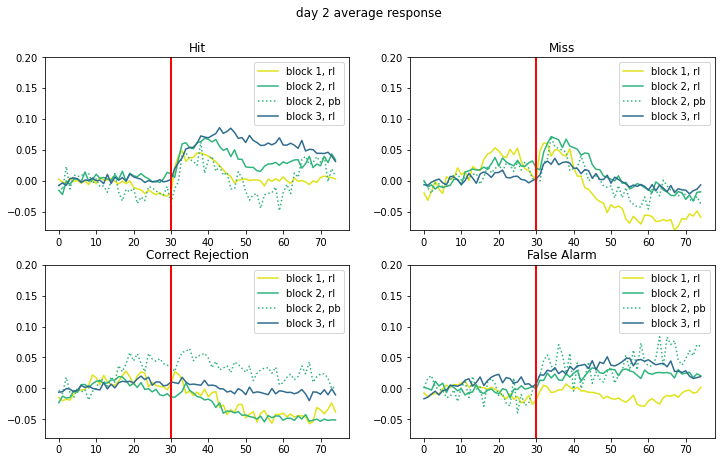

In [110]:
plt.figure(figsize=(12, 7))
for i in range(3, 6):
    block = data[0, i]
    pb_spks = get_tone_response_df(data[0, i], context='pb')
    rl_spks = get_tone_response_df(data[0, i], context='rl')
    nb = i-3
    for k in range(4):
        plt.subplot(2, 2, k+1)
        plt.title(titles[k])
        plt.plot(np.average(rl_spks[k], axis=0), label='block {}, rl'.format(nb+1), color=cmap(0.3*nb+0.05))
        if len(pb_spks[k])>0:
            plt.plot(np.average(pb_spks[k], axis=0), label='block {}, pb'.format(nb+1), color=cmap(0.3*nb+0.05), linestyle=':')
        plt.axvline(x=30, c='red')
        # plt.axhline(y=0, c='grey', alpha=0.2)
        plt.ylim([-0.08, 0.2])
        plt.legend()
plt.suptitle('day 2 average response')
plt.show()

## axon activity heatmap
one figure per day.

(175, 75)
(175, 75)
(175, 75)
(175, 75)


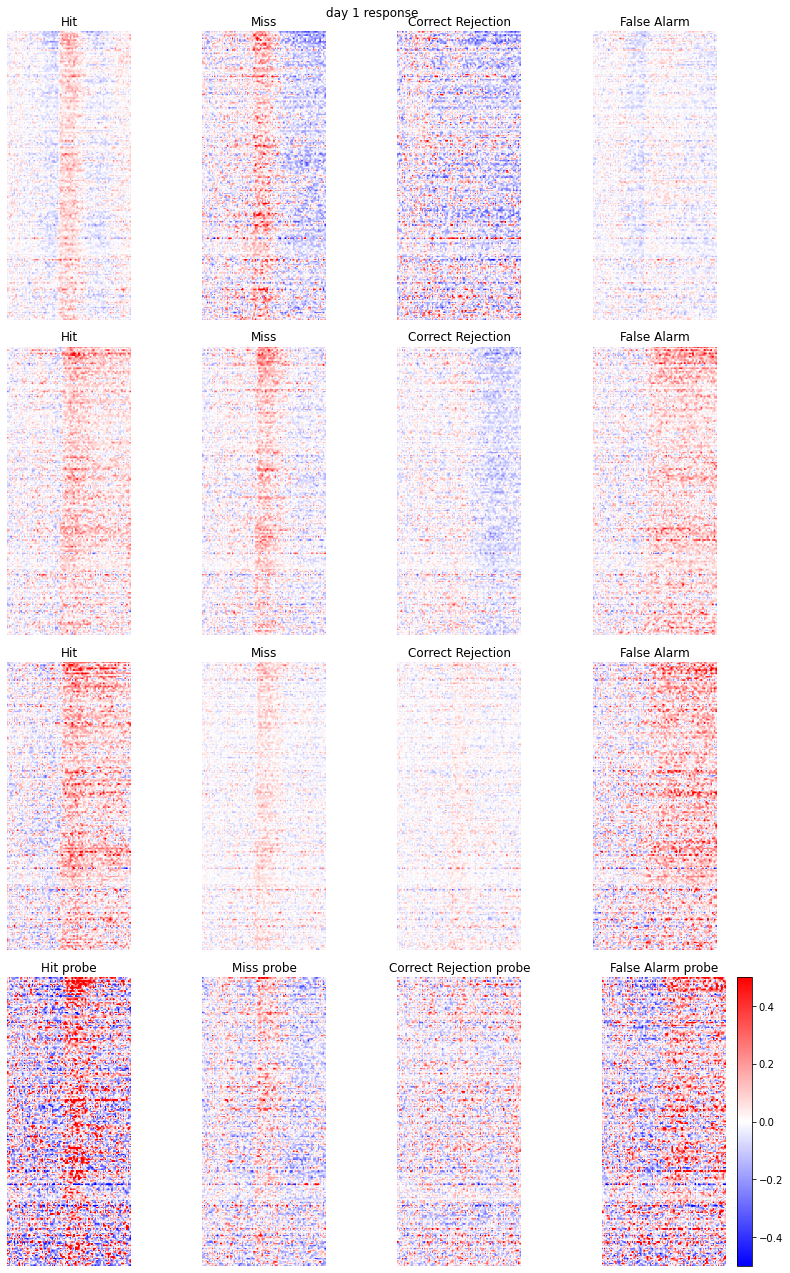

In [119]:
plt.figure(figsize=(12, 18))
plt.set_cmap('bwr')
nplot = 1
for i in range(3):
    block = data[0, i]
    pb_spks = get_tone_response_df(data[0, i], context='pb')
    rl_spks = get_tone_response_df(data[0, i], context='rl')
    for k in range(4):
        plt.subplot(4, 4, nplot)
        nplot += 1
        plt.title(titles[k])
        if len(rl_spks[k])>0:
            plt.imshow(rl_spks[k], vmin=-0.5, vmax=0.5)
        plt.axis('off')

for i in range(3):
    block = data[0, i]
    pb_spks = get_tone_response_df(data[0, i], context='pb')
    rl_spks = get_tone_response_df(data[0, i], context='rl')
    for k in range(4):
        if len(pb_spks[k])>0:
            plt.subplot(4, 4, nplot)
            nplot += 1
            plt.imshow(pb_spks[k], vmin=-0.5, vmax=0.5)
            print(pb_spks[k].shape)
            plt.title(titles[k]+ ' probe')
        plt.axis('off')
plt.colorbar()
plt.suptitle('day 1 response')
plt.tight_layout()
plt.show()

In [123]:
for j, day in enumerate(idays):
    fig_save_path = os.path.join('figures', 'daily_heatmap', 'day-{}_avg-response'.format(day))
    istart = iblocks[j]
    iend = istart + nblocks[j]
    plt.figure(figsize=(12, 18))
    plt.set_cmap('bwr')
    nplot = 1
    for i in range(istart, iend):
        block = data[0, i]
        # pb_spks = get_tone_response_df(data[0, i], context='pb')
        rl_spks = get_tone_response_df(data[0, i], context='rl')
        for k in range(4):
            plt.subplot(4, 4, nplot)
            nplot += 1
            plt.title(titles[k])
            if len(rl_spks[k])>0:
                plt.imshow(rl_spks[k], vmin=-0.5, vmax=0.5)
                print(rl_spks[k].shape)
            plt.axis('off')

    for i in range(istart, iend):
        pb_spks = get_tone_response_df(data[0, i], context='pb')
        # rl_spks = get_tone_response_df(data[0, i], context='rl')
        for k in range(4):
            if len(pb_spks[k])>0:
                plt.subplot(4, 4, nplot)
                nplot += 1
                plt.imshow(pb_spks[k], vmin=-0.5, vmax=0.5)
                print(pb_spks[k].shape)
                plt.title(titles[k]+ ' probe')
            plt.axis('off')
    plt.colorbar()
    plt.suptitle('day {} average response'.format(day))
    plt.tight_layout()
    plt.savefig(fig_save_path)
    plt.close()

(175, 75)
(175, 75)
(175, 75)
(175, 75)
(175, 75)
(175, 75)
(175, 75)
(175, 75)
(175, 75)
(175, 75)
(175, 75)
(175, 75)
(175, 75)
(175, 75)
(175, 75)
(175, 75)
(141, 75)
(141, 75)
(141, 75)
(141, 75)
(141, 75)
(141, 75)
(141, 75)
(141, 75)
(141, 75)
(141, 75)
(141, 75)
(141, 75)
(141, 75)
(141, 75)
(141, 75)
(141, 75)
(205, 75)
(205, 75)
(205, 75)
(205, 75)
(205, 75)
(205, 75)
(205, 75)
(205, 75)
(205, 75)
(205, 75)
(205, 75)
(205, 75)
(205, 75)
(205, 75)
(205, 75)
(205, 75)
(139, 75)
(139, 75)
(139, 75)
(139, 75)
(139, 75)
(139, 75)
(139, 75)
(139, 75)
(139, 75)
(139, 75)
(139, 75)
(158, 75)
(158, 75)
(158, 75)
(158, 75)
(158, 75)
(158, 75)
(158, 75)
(158, 75)
(158, 75)
(158, 75)
(169, 75)
(169, 75)
(169, 75)
(169, 75)
(169, 75)
(169, 75)
(169, 75)
(169, 75)
(169, 75)
(169, 75)
(169, 75)
(169, 75)
(169, 75)
(169, 75)
(171, 75)
(171, 75)
(171, 75)
(171, 75)
(171, 75)
(171, 75)
(171, 75)
(171, 75)
(171, 75)
(171, 75)
(187, 75)
(187, 75)
(187, 75)
(187, 75)
(187, 75)
(187, 75)
(187, 75)


## max response distribution

In [6]:
# max response
# average of response in 40-50 frames after stimuli onset.
i = 0
block = data[0, i]
pb_spks = get_all_tone_response(data[0, i], context='pb') # [hit_spk, miss_spk, cr_spk, fa_apk] or none
rl_spks = get_all_tone_response(data[0, i], context='rl')

In [11]:
print(len(pb_spks[0]), rl_spks[0].shape)

0 (40, 75)


In [18]:
# plot rl max response
max_response_all = []
block_idx = []
for k in range(4):
    max_response_all.append([])
    block_idx.append([])

for i in range(nBlocks):
    block = data[0, i]
    pb_spks = get_all_tone_response(data[0, i], context='pb')
    rl_spks = get_all_tone_response(data[0, i], context='rl')
# plt.figure(figsize=(10, 8))
    if rl_spks:
        for k in range(4):
            # plt.subplot(2,2,k+1)
            if len(rl_spks[k]) > 0:
                max_response = np.max(rl_spks[k][:, 30:50], axis=1)
                max_response_all[k].append(max_response)
                block_idx[k].append(i*np.ones(max_response.shape[0]))
#     plt.plot(np.arange(len(max_response)), max_response)
#     plt.title(titles[k])
# plt.show()

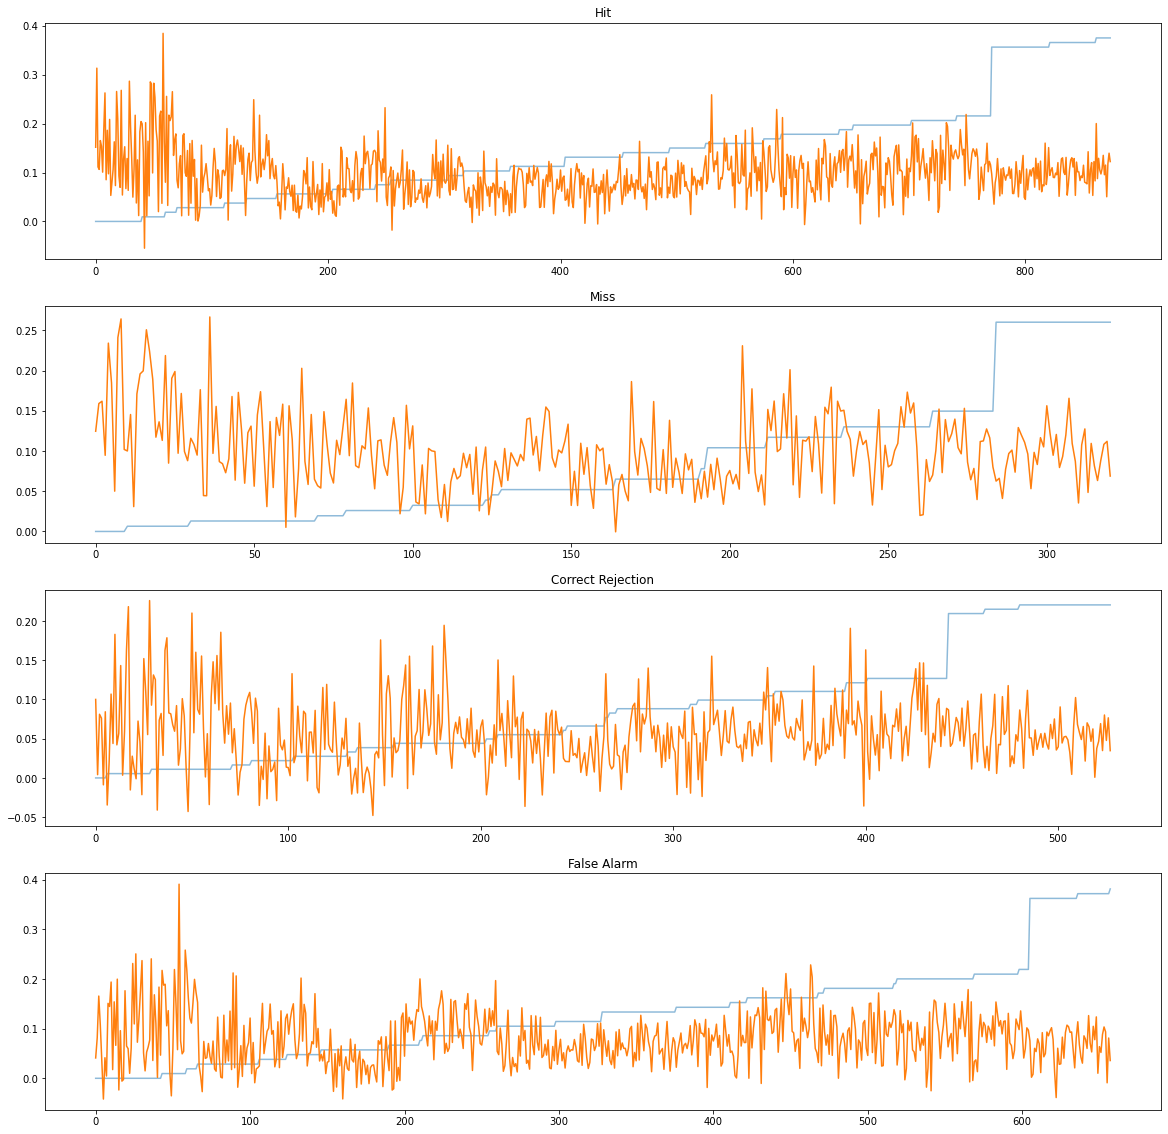

In [28]:
plt.figure(figsize=(20, 20))
for k in range(4):
    plt.subplot(4,1,k+1)
    y = np.hstack(max_response_all[k])
    yb = np.hstack(block_idx[k])
    x = np.arange(y.shape[0])
    yb = yb*np.max(y)/nBlocks
    plt.plot(x, yb, alpha=0.5)
    plt.plot(x, y)
    plt.title(titles[k])
plt.show()

In [143]:
for k in range(4):
    print(len(pb_spks[k]), rl_spks[k].shape)

0 (40, 75)
0 (10, 75)
0 (6, 75)
0 (43, 75)


In [29]:
# plot pb max response
max_response_all = []
block_idx = []
for k in range(4):
    max_response_all.append([])
    block_idx.append([])

for i in range(nBlocks):
    block = data[0, i]
    pb_spks = get_all_tone_response(data[0, i], context='pb')
    if pb_spks:
        for k in range(4):
            if len(pb_spks[k]) > 0:
                max_response = np.max(pb_spks[k][:, 30:50], axis=1)
                max_response_all[k].append(max_response)
                block_idx[k].append(i*np.ones(max_response.shape[0]))

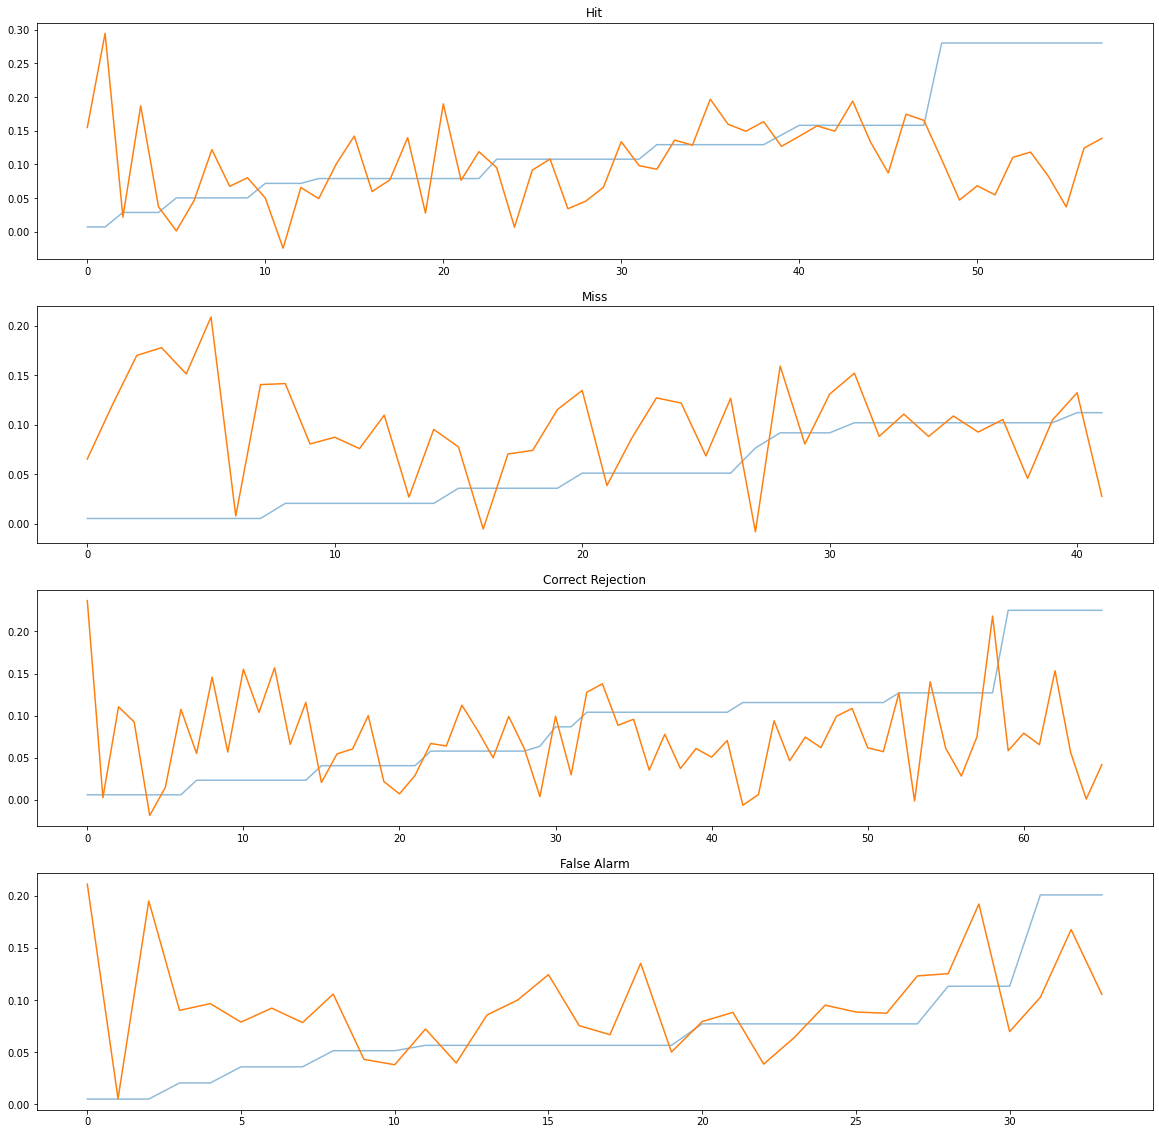

In [30]:
plt.figure(figsize=(20, 20))
for k in range(4):
    plt.subplot(4,1,k+1)
    y = np.hstack(max_response_all[k])
    yb = np.hstack(block_idx[k])
    x = np.arange(y.shape[0])
    yb = yb*np.max(y)/nBlocks
    plt.plot(x, yb, alpha=0.5)
    plt.plot(x, y)
    plt.title(titles[k])
plt.show()

### daily axon activity

In [88]:
behavior = block['behavdata']
print(behavior.shape)

(4, 9496)


In [168]:
def max_response_block(block):
    '''
    return spks in every block
    context: 'rl' or 'pb', 'rl' is default
    '''
#     ttidxs = [] # target tone idx
#     ftidxs = [] # foil tone idx
    
    raw_spks = block['imagingdata']
    NA, NT = raw_spks.shape
    spks = raw_spks

    if NT > 0:
        behavior = block['behavdata']
        icondition = np.where(behavior[0]<3)[0] # Rl condition indexes
        
        trial_idx = np.where(behavior[0] > 0)[0] # frame idx of all trilas
        print('number of trials in this block: ', trial_idx.shape)
        
        all_df = []
        outcomes = []
        contexts = []
        for i in range(4):
            outcomes.append([])
        for k in trial_idx:
            if (30 <= k) and ((k+45) <= NT):
                f0 = np.mean(spks[:, (k-30):(k-15)], axis=1)
                ft = spks[:, (k-30):(k+45)]
                f0 = np.repeat(f0[:, np.newaxis], ft.shape[-1], axis=1)
                df = (ft - f0) / f0
                all_df.append(np.max(df[:, 30:45], axis=1).reshape((-1, 1)))
                outcomes.append(behavior[1, k]) # trial outcomes in final max_response
                contexts.append(behavior[0, k])
        max_responses = np.hstack(all_df)
        outcomes = np.hstack(outcomes)
        contexts = np.hstack(contexts)
        print('max response shape: ', max_responses.shape)
        print('outcomes shape: ', outcomes.shape)
        print('contexts shape: ', contexts.shape)

#         if context == 'rl':
#             # target tone
#             itt = np.where(behavior[0]==1)[0]
#             # foil tone
#             ift = np.where(behavior[0]==2)[0]
#         elif context == 'pb':
#             itt = np.where(behavior[0]==3)[0]
#             ift = np.where(behavior[0]==4)[0]
#         else:
#             printn("only support 'rl' or 'pb' as context!")
            
#         outcomes = ['Hit', 'Miss', 'FA', 'CR']
#         ## 2 outcomes
#         for i in range(2):
#             oidx = np.where(behavior[1] == (i+1))[0] # outcome idx
#             oidx = np.intersect1d(itt, oidx) # overlap of tone  context and outcome idx
#             print('number of {} trials'.format(outcomes[i]), oidx.shape)
#             ttidxs.append(oidx)
            
#             oidx = np.where(behavior[1] == (4-i))[0] # outcome idx
#             oidx = np.intersect1d(ift, oidx) # overlap of ton and outcome idx
#             print('number of {} trials'.format(outcomes[3-i]), oidx.shape)
#             ftidxs.append(oidx)
        # outcome_idx = [ttidxs[0], ttidxs[1], ftidxs[0], ftidxs[1]] 
        # [hit_idx, miss_idx, cr_idx, fa_idx]
        return max_responses, outcomes, contexts
    else:
        return None

In [101]:
i = 0
max_responses, outcomes, contexts = max_response_block(data[0, i])

number of trials in this block:  (100,)
max response shape:  (175, 100)
outcomes shape:  (100,)
contexts shape:  (100,)


In [147]:
idays = []
for i in range(nBlocks):
    block = data[0, i]
    day = block['day']
    if len(day[0]) > 0:
        day = day[0][0]
        idays.append(day)
idays = np.array(idays)
nDays = np.max(idays)

In [66]:
print(idays)

[ 1  1  1  2  2  2  3  3  3  4  4  5  5  6  6  6  7  7  8  8  9  9  9 15
 15 15]


In [149]:
def max_response_day(data, day=1):
    iblocks = []
    for i in range(nBlocks):
        block = data[0, i]
        d = block['day']
        if len(d[0]) > 0:
            d = d[0][0]
            if d == day:
                iblocks.append(i)
    if len(iblocks) > 0:
        contexts_day = []
        outcomes_day = []
        max_responses_day = []
        block_idxs = []
        ib = 1
        for i in iblocks:
            max_response, outcomes, contexts = max_response_block(data[0, i])
            max_responses_day.append(max_response)
            block_idxs.append(ib*np.ones(len(outcomes)))
            ib += 1
            contexts_day.append(contexts)
            outcomes_day.append(outcomes)
    #         for j in range(4):
    #             outcome_idx[j] += last_max_idx
    #             outcome_idxs_day[j].append(outcome_idx[j])
    #         if len(max_response) > 0:
    #             print(last_max_idx, outcome_idx[j].max())
    #             last_max_idx += max_response.shape[-1]

        max_responses_day = np.hstack(max_responses_day)
        contexts_day = np.hstack(contexts_day)
        outcomes_day = np.hstack(outcomes_day)
        block_idxs = np.hstack(block_idxs)
        print('daily respose shape: ', max_responses_day.shape)
        print('daily outcomes shape: ', outcomes_day.shape)
        print('daily contexts shape: ', contexts_day.shape)
        print('daily blocks idx shape: ', block_idxs.shape)
    
        return max_responses_day, outcomes_day, contexts_day, block_idxs
    else:
        return None

In [169]:
max_responses, outcomes, contexts, block_idxs = max_response_day(data, day=2)

number of trials in this block:  (100,)
max response shape:  (141, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (141, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (141, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
daily respose shape:  (141, 300)
daily outcomes shape:  (300,)
daily contexts shape:  (300,)
daily blocks idx shape:  (300,)


In [170]:
print(outcomes.shape, contexts.shape)

(300,) (300,)


C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/60245484.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xticks(x, blocks.astype(np.int))
C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/60245484.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release n

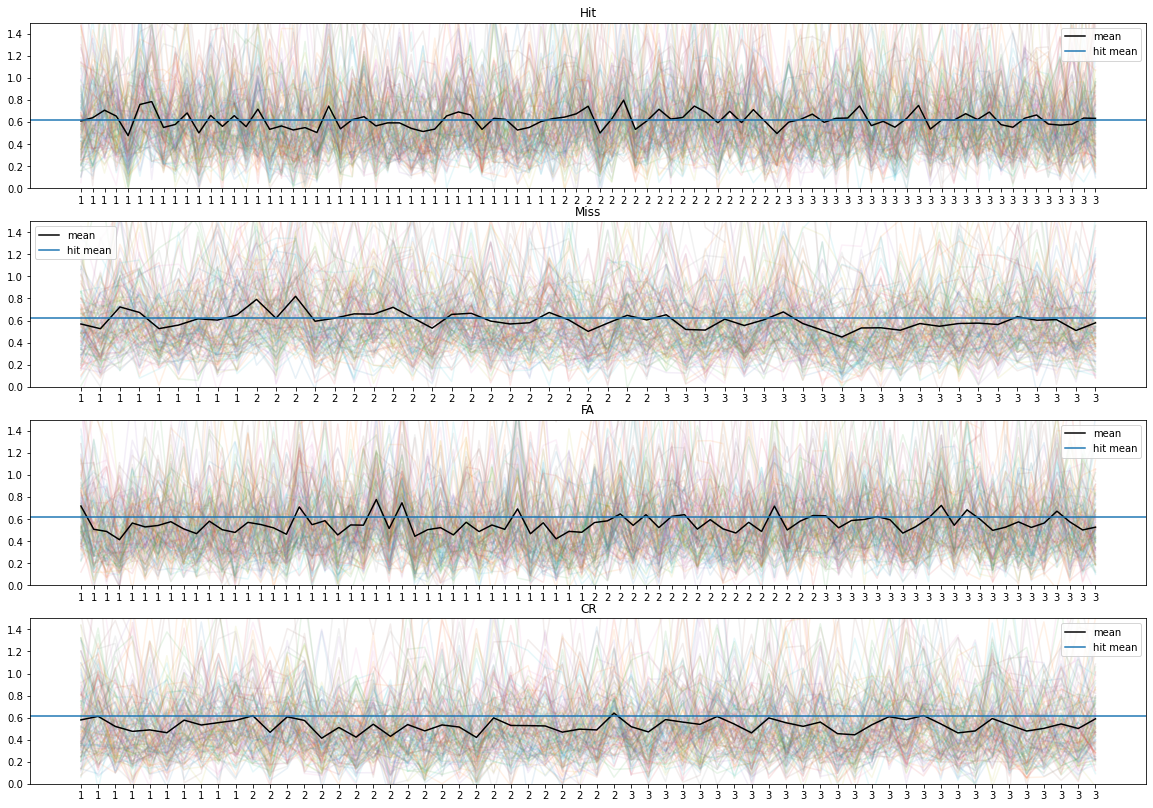

In [173]:
# RL
outcome_names = ['Hit', 'Miss', 'FA', 'CR']
plt.figure(figsize=(20,14))
nfig = 1
for i in range(2):
    cidx = np.where(contexts == (i+1))[0]
    for j in range((2*i+1), (2*i+3)):
        oidx = np.where(outcomes == j)[0]
        # print(cidx.shape, oidx.shape)
        idx = np.intersect1d(cidx, oidx) # overlap of tone context and outcome idx
        # print(idx.shape)
        spks = max_responses[:, idx]
        blocks = block_idxs[idx]
        plt.subplot(4, 1, nfig)
        nfig += 1
        x = np.arange(len(blocks))
        for k in range(spks.shape[0]):
            plt.plot(x, spks[k], alpha = 0.1)
        plt.plot(x, np.mean(spks, axis=0), c='black', label='mean')
        if nfig == 2:  # first plot
            hline = np.mean(spks)
        plt.xticks(x, blocks.astype(np.int))
        plt.axhline(y=hline, label='hit mean')
        plt.ylim([0.0,1.5])
        plt.title(outcome_names[j-1])
        plt.legend()
plt.show()

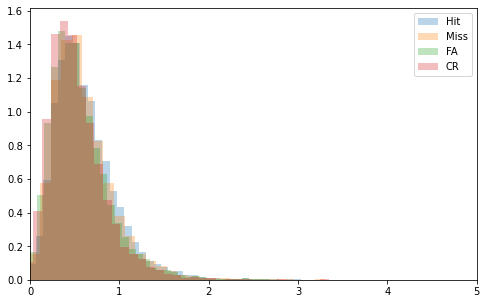

In [172]:
plt.figure(figsize=(8,5))
nfig = 1
for i in range(2):
    cidx = np.where(contexts == (i+1))[0]
    for j in range((2*i+1), (2*i+3)):
        oidx = np.where(outcomes == j)[0]
        # print(cidx.shape, oidx.shape)
        idx = np.intersect1d(cidx, oidx) # overlap of tone context and outcome idx
        # print(idx.shape)
        spks = max_responses[:, idx]
        blocks = block_idxs[idx]
        # plt.subplot(1, 4, nfig)
        nfig += 1
        plt.hist(spks.reshape(-1), bins=50, density=True, alpha = 0.3, label=outcome_names[j-1])
plt.xlim([0, 5])
#         plt.ylim([0, 2000])
plt.legend()
plt.show()

C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/2766220871.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xticks(x, blocks.astype(np.int))
C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/2766220871.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the relea

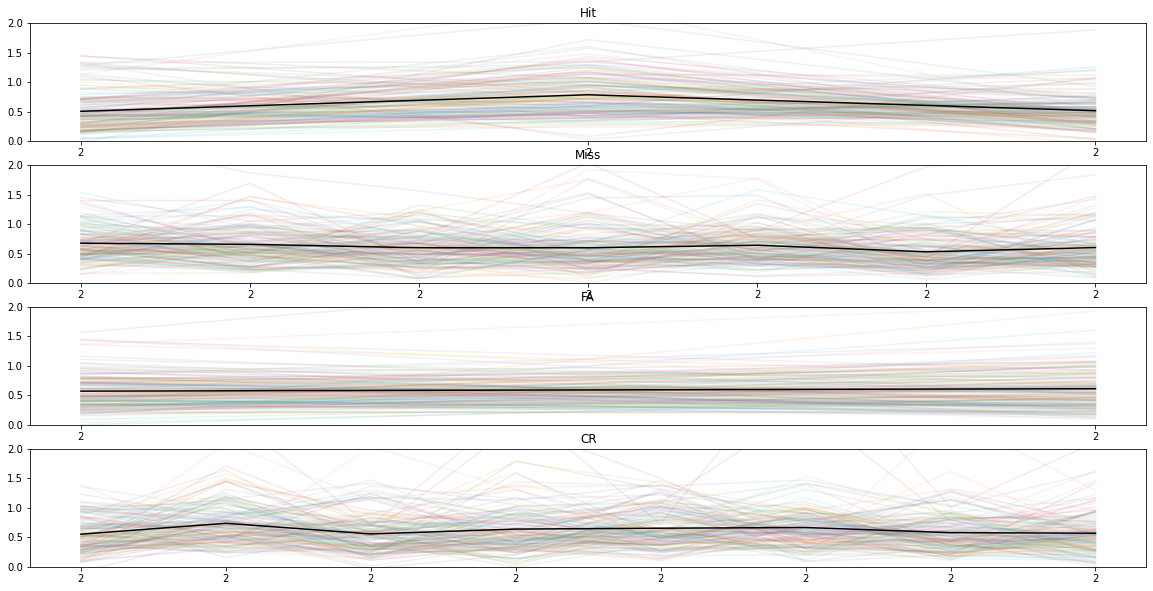

In [174]:
# RL
outcome_names = ['Hit', 'Miss', 'FA', 'CR']
plt.figure(figsize=(20,13))
nfig = 1
for i in range(2):
    cidx = np.where(contexts == (i+3))[0]
    for j in range((2*i+1), (2*i+3)):
        oidx = np.where(outcomes == j)[0]
        # print(cidx.shape, oidx.shape)
        idx = np.intersect1d(cidx, oidx) # overlap of tone context and outcome idx
        # print(idx.shape)
        spks = max_responses[:, idx]
        blocks = block_idxs[idx]
        plt.subplot(4, 1, nfig)
        nfig += 1
        x = np.arange(len(blocks))
        for k in range(spks.shape[0]):
            plt.plot(x, spks[k], alpha = 0.1)
        plt.plot(x, np.mean(spks, axis=0), c='black')
        plt.xticks(x, blocks.astype(np.int))
        plt.ylim([0,2])
        plt.title(outcome_names[j-1])
plt.show()

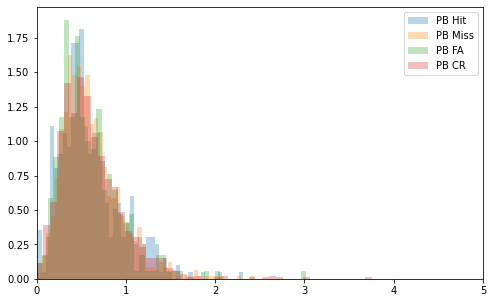

In [175]:
plt.figure(figsize=(8,5))
nfig = 1

for i in range(2):
    cidx = np.where(contexts == (i+3))[0]
    for j in range((2*i+1), (2*i+3)):
        oidx = np.where(outcomes == j)[0]
        # print(cidx.shape, oidx.shape)
        idx = np.intersect1d(cidx, oidx) # overlap of tone context and outcome idx
        # print(idx.shape)
        spks = max_responses[:, idx]
        blocks = block_idxs[idx]
        # plt.subplot(1, 4, nfig)
        nfig += 1
        plt.hist(spks.reshape(-1), bins=50, density=True, alpha = 0.3, label='PB {}'.format(outcome_names[j-1]))
plt.xlim([0, 5])
#         plt.ylim([0, 2000])
plt.legend()
plt.show()

In [177]:
# RL
for d in range(1, nDays+1):
    fig_save_path = os.path.join('figures', 'axon-maxresponse_{}_day-{}'.format(mouse_name, d))
    res = max_response_day(data, day=d)
    if res:
        max_responses, outcomes, contexts, block_idxs = res[0], res[1], res[2], res[3]
        outcome_names = ['Hit', 'Miss', 'FA', 'CR']
        plt.figure(figsize=(20,14))
        nfig = 1
        for i in range(2):
            cidx = np.where(contexts == (i+1))[0]
            for j in range((2*i+1), (2*i+3)):
                oidx = np.where(outcomes == j)[0]
                # print(cidx.shape, oidx.shape)
                idx = np.intersect1d(cidx, oidx) # overlap of tone context and outcome idx
                # print(idx.shape)
                spks = max_responses[:, idx]
                blocks = block_idxs[idx]
                plt.subplot(4, 1, nfig)
                nfig += 1
                x = np.arange(len(blocks))
                for k in range(spks.shape[0]):
                    plt.plot(x, spks[k], alpha = 0.1)
                plt.plot(x, np.mean(spks, axis=0), c='black', label='mean')
                if nfig == 2:  # first plot
                    hline = np.mean(spks)
                plt.xticks(x, blocks.astype(np.int))
                plt.axhline(y=hline, label='hit mean')
                plt.ylim([0.0,1.5])
                plt.title(outcome_names[j-1])
                plt.legend()
        plt.suptitle('day {}'.format(d))
        plt.savefig(fig_save_path)
        plt.close()

number of trials in this block:  (100,)
max response shape:  (175, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (175, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (175, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
daily respose shape:  (175, 300)
daily outcomes shape:  (300,)
daily contexts shape:  (300,)
daily blocks idx shape:  (300,)


C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xticks(x, blocks.astype(np.int))
C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

number of trials in this block:  (100,)
max response shape:  (141, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (141, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (141, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
daily respose shape:  (141, 300)
daily outcomes shape:  (300,)
daily contexts shape:  (300,)
daily blocks idx shape:  (300,)


C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xticks(x, blocks.astype(np.int))
C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

number of trials in this block:  (100,)
max response shape:  (205, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (205, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (205, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
daily respose shape:  (205, 300)
daily outcomes shape:  (300,)
daily contexts shape:  (300,)
daily blocks idx shape:  (300,)


C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xticks(x, blocks.astype(np.int))
C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

number of trials in this block:  (100,)
max response shape:  (139, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (139, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
daily respose shape:  (139, 200)
daily outcomes shape:  (200,)
daily contexts shape:  (200,)
daily blocks idx shape:  (200,)


C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xticks(x, blocks.astype(np.int))
C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

number of trials in this block:  (100,)
max response shape:  (158, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (158, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
daily respose shape:  (158, 200)
daily outcomes shape:  (200,)
daily contexts shape:  (200,)
daily blocks idx shape:  (200,)


C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xticks(x, blocks.astype(np.int))
C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

number of trials in this block:  (100,)
max response shape:  (169, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (169, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (169, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
daily respose shape:  (169, 300)
daily outcomes shape:  (300,)
daily contexts shape:  (300,)
daily blocks idx shape:  (300,)


C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xticks(x, blocks.astype(np.int))
C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

number of trials in this block:  (100,)
max response shape:  (171, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (171, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
daily respose shape:  (171, 200)
daily outcomes shape:  (200,)
daily contexts shape:  (200,)
daily blocks idx shape:  (200,)


C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xticks(x, blocks.astype(np.int))
C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

number of trials in this block:  (100,)
max response shape:  (187, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (187, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
daily respose shape:  (187, 200)
daily outcomes shape:  (200,)
daily contexts shape:  (200,)
daily blocks idx shape:  (200,)


C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xticks(x, blocks.astype(np.int))
C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

number of trials in this block:  (100,)
max response shape:  (198, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (198, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (198, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
daily respose shape:  (198, 300)
daily outcomes shape:  (300,)
daily contexts shape:  (300,)
daily blocks idx shape:  (300,)


C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xticks(x, blocks.astype(np.int))
C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

number of trials in this block:  (100,)
max response shape:  (180, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (180, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (180, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
daily respose shape:  (180, 300)
daily outcomes shape:  (300,)
daily contexts shape:  (300,)
daily blocks idx shape:  (300,)


C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xticks(x, blocks.astype(np.int))
C:\Users\fdu5\AppData\Local\Temp\35/ipykernel_49556/8241896.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

In [198]:
rl_avg_maxs = np.zeros((4, nDays))
pb_avg_maxs = np.zeros((4, nDays)) # first dim same as outcome index
for d in range(1, nDays+1):
    res = max_response_day(data, day=d)
    if res:
        max_responses, outcomes, contexts, block_idxs = res[0], res[1], res[2], res[3]
        outcome_names = ['Hit', 'Miss', 'FA', 'CR']
        for i in range(2):
            # rl
            cidx = np.where(contexts == (i+1))[0]
            for j in range((2*i+1), (2*i+3)):
                oidx = np.where(outcomes == j)[0]
                # print(cidx.shape, oidx.shape)
                idx = np.intersect1d(cidx, oidx) # overlap of tone context and outcome idx
                # print(idx.shape)
                spks = max_responses[:, idx]
                rl_avg_maxs[j-1, d-1] = np.mean(spks) 
            # pb
            cidx = np.where(contexts == (i+3))[0]
            for j in range((2*i+1), (2*i+3)):
                oidx = np.where(outcomes == j)[0]
                # print(cidx.shape, oidx.shape)
                idx = np.intersect1d(cidx, oidx) # overlap of tone context and outcome idx
                # print(idx.shape)
                spks = max_responses[:, idx]
                if spks.shape[-1] > 0:
                    pb_avg_maxs[j-1, d-1] = np.mean(spks)

number of trials in this block:  (100,)
max response shape:  (175, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (175, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (175, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
daily respose shape:  (175, 300)
daily outcomes shape:  (300,)
daily contexts shape:  (300,)
daily blocks idx shape:  (300,)
number of trials in this block:  (100,)
max response shape:  (141, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (141, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
number of trials in this block:  (100,)
max response shape:  (141, 100)
outcomes shape:  (100,)
contexts shape:  (100,)
daily respose shape:  (141, 300)
daily outcomes shape:  (300,)
daily contexts shape:  (300,)
daily blocks idx shape:  (300,)
number of trials in this block

In [188]:
print(rl_avg_maxs)

[[0.8912524  0.61893839 0.48748654 0.54586732 0.40054324 0.5013476
  0.65037346 0.76056892 0.65335321 0.         0.         0.
  0.         0.         0.67365092]
 [0.86167914 0.5998987  0.51038522 0.53322494 0.39169812 0.49733073
  0.66992396 0.75140071 0.64434576 0.         0.         0.
  0.         0.         0.67958075]
 [0.81683409 0.55751038 0.43270314 0.56674039 0.38072005 0.48745799
  0.63045436 0.73076355 0.61144114 0.         0.         0.
  0.         0.         0.63399309]
 [0.78105813 0.52833593 0.45864332 0.49132049 0.33465919 0.45817521
  0.58303463 0.69913071 0.60078377 0.         0.         0.
  0.         0.         0.60704279]]


In [192]:
print(pb_avg_maxs)

[[1.00968587 0.60572392 0.44663617 0.45920825 0.46518266 0.50531805
  0.72694641 0.75450402 0.69755113 0.         0.         0.
  0.         0.         0.65107983]
 [0.82983696 0.61551738 0.47351831 0.57796836 0.         0.39535993
  0.67796522 0.75774705 0.5998925  0.         0.         0.
  0.         0.         0.        ]
 [0.83901918 0.5934332  0.5047434  0.50834179 0.42771986 0.52080917
  0.         0.         0.66714352 0.         0.         0.
  0.         0.         0.70426571]
 [0.80424213 0.6184755  0.43835402 0.50639421 0.31529763 0.47255766
  0.61005026 0.67358446 0.6129626  0.         0.         0.
  0.         0.         0.62615341]]


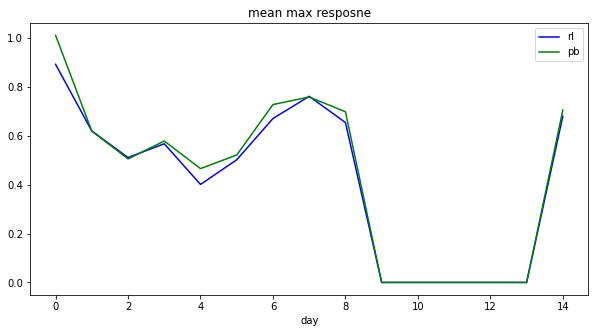

In [193]:
x = np.arange(nDays)
plt.figure(figsize=(10,5))
plt.plot(x, rl_avg_maxs.max(axis=0), c='blue', label='rl')
plt.plot(x, pb_avg_maxs.max(axis=0), c='green', label='pb')
plt.legend()
plt.title('mean max resposne')
plt.xlabel('day')
plt.show()

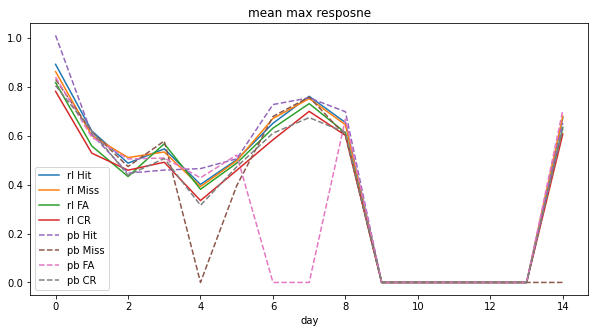

In [199]:
x = np.arange(nDays)
outcome_names = ['Hit', 'Miss', 'FA', 'CR']
plt.figure(figsize=(10,5))
for i in range(4):
    plt.plot(x, rl_avg_maxs[i], label='rl {}'.format(outcome_names[i]))
for i in range(4):
    plt.plot(x, pb_avg_maxs[i], label='pb {}'.format(outcome_names[i]), linestyle='--')
plt.legend()
plt.title('mean max resposne')
plt.xlabel('day')
plt.show()

In [ ]:
# 